In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pickle  # For saving and loading the data
import sdf_helper as sh
import os as os
%matplotlib inline
hard_drive = '/volumes/My Passport/MMath Project'
os.chdir(hard_drive)


In [4]:
data_dir = 'sim_800_15/Data'
data = sh.getdata(1,data_dir, verbose=False)

### Global Matplotlib Formatting

In [5]:
# LaTeX for plot labels
plt.rcParams['text.usetex'] = True

# Specify the LaTeX package for standard math fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


plt.rcParams['xtick.labelsize'] = 20  # Example for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 20 

### Calculate Maximum $\left|V_x\right|$ along reconnection layer $z=0$

#### $S_L = 3.16 \times 10^{5}$

In [6]:
# Get number of cells
data = sh.getdata(0,data_dir,verbose=False)
nx, ny = data.Grid_Grid_mid.dims
xb = data.Grid_Grid.data[0]
# Get number of sdf files
import glob
N = len(glob.glob1(data_dir,"*.sdf"))

# Loop through files storing times and Vx(y=0)
times = np.zeros(N)
Vx_boundary = np.zeros((nx+1,N))
Vx_max = np.zeros(N)
for ind in range(0,N):
    data = sh.getdata(ind,data_dir,verbose=False)
    times[ind] = data.Last_dump_time_requested.data
    Vx_boundary[:,ind] = data.Velocity_Vx.data[:,0]
    Vx_max[ind] = np.max(np.abs(Vx_boundary[:,ind]))


#### $S_L = 1.78 \times 10^{4}$

In [18]:
# Get number of cells
data_dir = 'sim_800_10/Data'
data = sh.getdata(0,data_dir,verbose=False)
nx, ny = data.Grid_Grid_mid.dims
xb = data.Grid_Grid.data[0]
# Get number of sdf files
import glob
N = len(glob.glob1(data_dir,"*.sdf"))

# Loop through files storing times and Vx(y=0)
times = np.zeros(N)
Vx_boundary_mid = np.zeros((nx+1,N))
Vx_max_mid = np.zeros(N)
for ind in range(0,N):
    data = sh.getdata(ind,data_dir,verbose=False)
    times[ind] = data.Last_dump_time_requested.data
    Vx_boundary_mid[:,ind] = data.Velocity_Vx.data[:,0]
    Vx_max_mid[ind] = np.max(np.abs(Vx_boundary_mid[:,ind]))


#### $S_L = 5.63 \times 10^{3}$

In [19]:
# Get number of cells
data_dir = 'sim_800_8/Data'
data = sh.getdata(0,data_dir,verbose=False)
nx, ny = data.Grid_Grid_mid.dims
xb = data.Grid_Grid.data[0]
# Get number of sdf files
import glob
N = len(glob.glob1(data_dir,"*.sdf"))

# Loop through files storing times and Vx(y=0)
times = np.zeros(N)
Vx_boundary_low = np.zeros((nx+1,N))
Vx_max_low = np.zeros(N)
for ind in range(0,N):
    data = sh.getdata(ind,data_dir,verbose=False)
    times[ind] = data.Last_dump_time_requested.data
    Vx_boundary_low[:,ind] = data.Velocity_Vx.data[:,0]
    Vx_max_low[ind] = np.max(np.abs(Vx_boundary_low[:,ind]))


### Main Burstiness plot for $S_L = 3.16 \times 10^{5}$

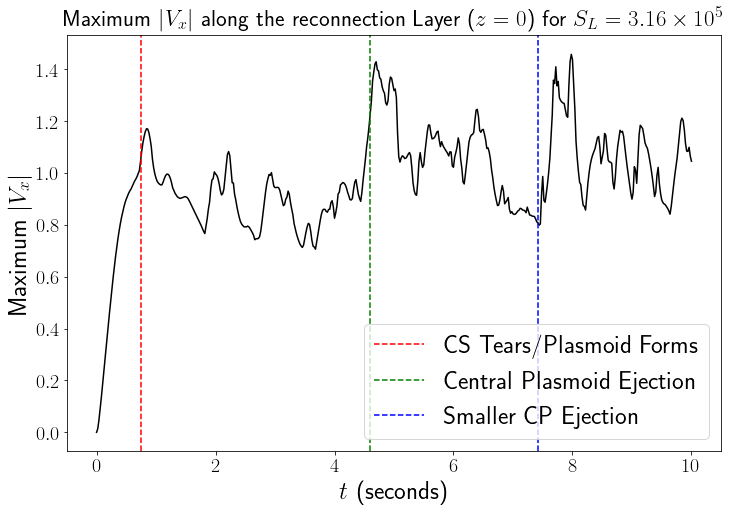

In [13]:
fig, ax = plt.subplots(layout='constrained', figsize=(10, 7))
#X, T = np.meshgrid( xb, times, indexing='ij')
#pc = ax.pcolormesh(X,T,Vx_boundary,cmap='bwr',vmin=-0.1,vmax=0.1)
plt.plot(times, Vx_max, 'black')
ax.axvline(0.75, color='red', linestyle='--', label='CS Tears/Plasmoid Forms')
ax.axvline(4.60, color='green', linestyle='--', label='Central Plasmoid Ejection')
ax.axvline(7.42, color='blue', linestyle='--', label='Smaller CP Ejection')

plt.legend(loc='lower right', fontsize=25)
ax.set_title(r'Maximum $\left|V_x \right|$ along the reconnection Layer ($z=0$) for $S_L = 3.16 \times 10^{5}$', fontsize=23, pad = 10)
ax.set_xlabel(r'$t$ (seconds)', fontsize=25)
ax.set_ylabel(r'Maximum $\left| V_x \right|$', fontsize=25)


#plt.savefig('velocity_max_bursty.png')
plt.show()

### Plot Sweet-Parker and Marginally unstable regime together

AttributeError: 'Text' object has no property 'pad'

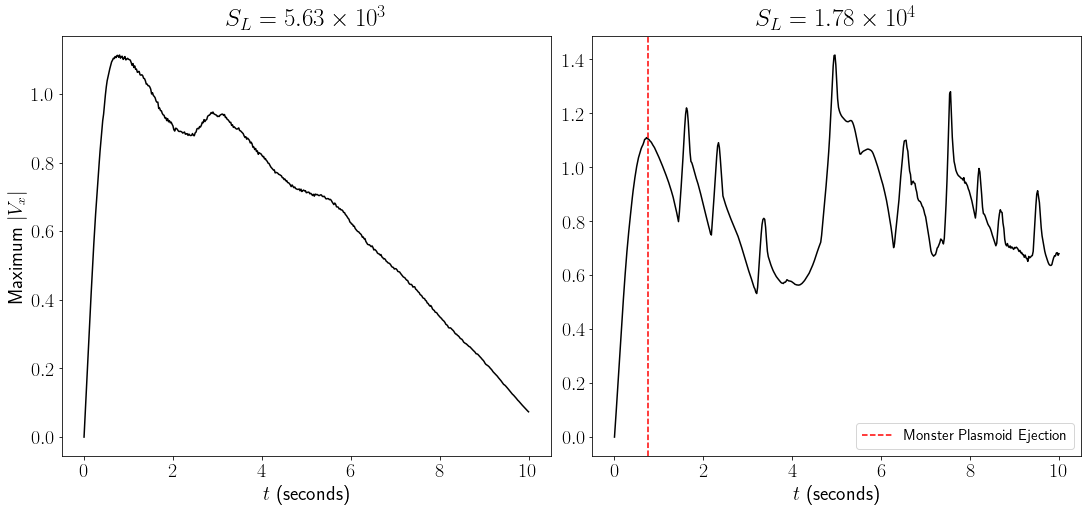

In [20]:

fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(15, 7))

# Plot SP 
axs[0].plot(times, Vx_max_low, 'black')
axs[0].set_title(r'$S_L = 5.63 \times 10^3$', fontsize=25, pad=10)
axs[0].set_xlabel(r'$t$ (seconds)', fontsize=20)
axs[0].set_ylabel(r'Maximum $\left| V_x \right|$', fontsize=20)

# Plot MU
axs[1].plot(times, Vx_max_mid, 'black')
axs[1].axvline(0.75, color='red', linestyle='--', label='Monster Plasmoid Ejection')
axs[1].legend(loc='lower right', fontsize=15)
axs[1].set_title(r'$S_L = 1.78 \times 10^4$', fontsize=25, pad=10)
axs[1].set_xlabel(r'$t$ (seconds)', fontsize=20)
#axs[1].tick_params(left=True, labelleft=False, bottom=True, labelbottom=True)

fig.suptitle(r'Maximum $\left|V_x \right|$ along the reconnection Layer ($z=0$) for $S_L = 5.63 \times 10^3$ and $S_L = 1.78 \times 10^4$', fontsize=23, pad = 10)

plt.tight_layout()
plt.show()


### 